# OASIS INFOBYTE INTERNSHIP

## TASK -1

  Submited by:-  DEEPTANSHU PANDEY

### Email Spam Detection

In this project, I used Python and its libraries to build an email spam detector. I also used machine learning so that it automatically classify which message is spam and which is not, by training the Naive Bayes ML Model

In [1]:
# importing all the useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the csv file of spam
data = pd.read_csv("F:\\Email Spam Detection\\spam.csv", encoding=('ISO-8859-1'))

In [3]:
# showing any 5 random rows from the dataset
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
113,spam,GENT! We are trying to contact you. Last weeke...,NaN,NaN,NaN
61,ham,Ha ha ha good joke. Girls are situation seekers.,NaN,NaN,NaN
2475,ham,Mm i am on the way to railway,NaN,NaN,NaN
2270,ham,U know we watchin at lido?,NaN,NaN,NaN
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

1. Data Cleaning
2. Exploratory Data Analysis
3. Text Processing
4. Model Building
5. Model Evaluation
6. Improvement
7. Website
8. Deployment

 #### 1.Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Since last three columns have large amount of nulls we are droping the last three columns 

In [7]:
#drpping last three columns

data.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming the column name so to get specific meaning
data.rename(columns={'v1': 'name', 'v2':'text'}, inplace= True)

In [10]:
data.head()

,name,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Since in name column only 'ham' and 'spam' is given so we give them the number 0, 1 by using LabelEncoder.

In [11]:
#importing Label Encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
data['name'] = encoder.fit_transform(data['name'])

In [13]:
data.head()

,name,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
data.isnull().sum()

name    0
text    0
dtype: int64

In [15]:
# check duplicates
data.duplicated().sum()

403

In [16]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [17]:
#checking duplicates
data.duplicated().sum()

0

In [18]:
data.shape

(5169, 2)

### 2. Exploratory Data Analysis

In [19]:
data.head()

,name,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['name'].value_counts()

0    4516
1     653
Name: name, dtype: int64

#### Hence value_counts will show the distribution that ham is more than spam in our dataset.

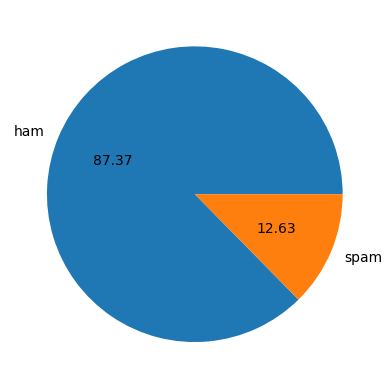

In [21]:
plt.pie(data['name'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

#### Data is imbalanced

In [22]:
#nltk --> Natural Language Toolkit Library
import nltk

for analysing the number of alphabets, words and characters used in the text

In [24]:
# for running the nltk, downloading a dependency
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Himanshu
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

For deeper analysis we are creating three coulmns 

     1.chars_number
     2.words_number
     3.sentence_numbers

In [23]:
# first we are finding the number of character used in the text
data['chars_number'] = data['text'].apply(len)

In [24]:
data['chars_number']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: chars_number, Length: 5169, dtype: int64

In [25]:
data.head()

,name,text,chars_number
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
data['text'].apply(lambda x:( nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
#number of words
data['words_number'] = data['text'].apply(lambda x:len( nltk.word_tokenize(x)))

In [28]:
data['words_number']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: words_number, Length: 5169, dtype: int64

In [28]:
data.head()

,name,text,chars_number,words_number
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# tockenising or breaking the sentence used in emails
data['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [29]:
# to find the number of sentences used in the email
data['sentence_numbers'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
data['sentence_numbers']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: sentence_numbers, Length: 5169, dtype: int64

In [30]:
data.head()

,name,text,chars_number,words_number,sentence_numbers
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
data[['chars_number','words_number','sentence_numbers']].describe().T

,count,mean,std,min,25%,50%,75%,max
chars_number,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
words_number,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
sentence_numbers,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


In [32]:
# for ham messeges
data[data['name']==0][['chars_number','words_number','sentence_numbers']].describe().T

,count,mean,std,min,25%,50%,75%,max
chars_number,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
words_number,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
sentence_numbers,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


In [33]:
# for spam messages
data[data['name']==1][['chars_number','words_number','sentence_numbers']].describe().T

,count,mean,std,min,25%,50%,75%,max
chars_number,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
words_number,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
sentence_numbers,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


<Axes: xlabel='chars_number', ylabel='Count'>

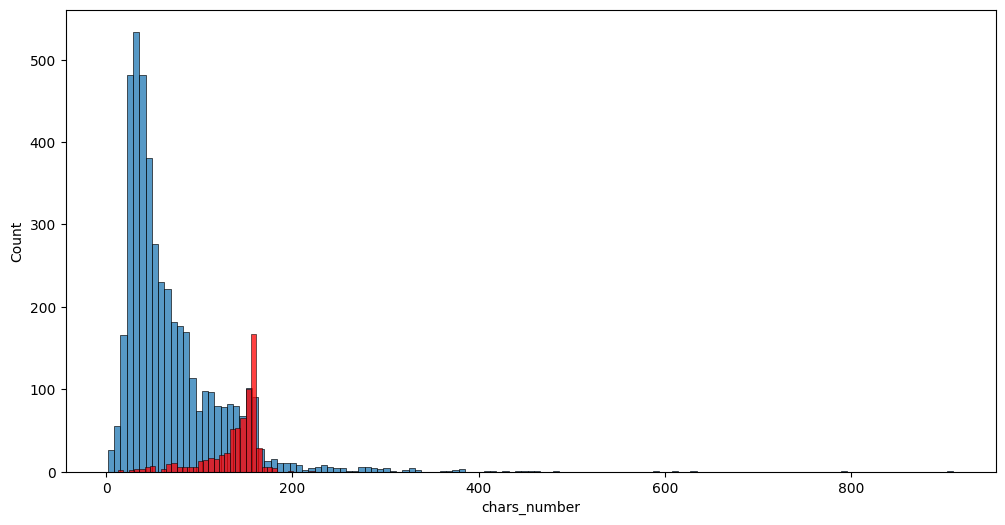

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['name']==0]['chars_number'])
sns.histplot(data[data['name']==1]['chars_number'], color= 'red')

<Axes: xlabel='words_number', ylabel='Count'>

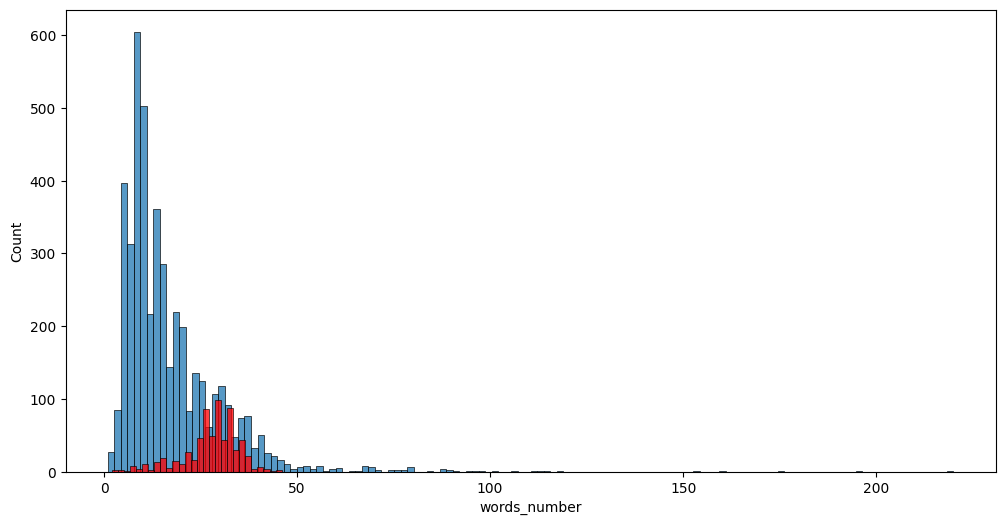

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['name']==0]['words_number'])
sns.histplot(data[data['name']==1]['words_number'], color= 'red')

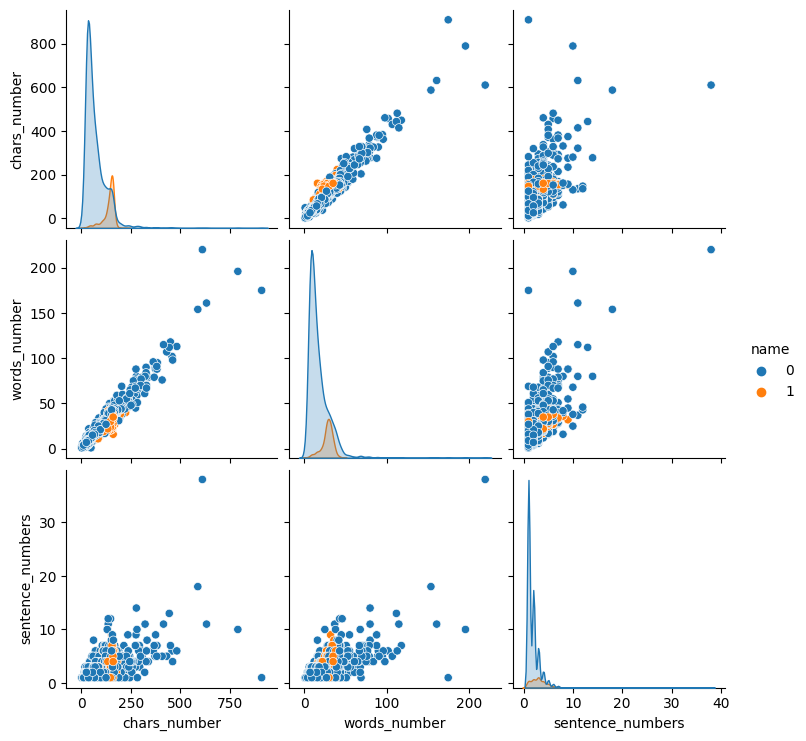

In [36]:
sns.pairplot(data, hue= 'name')

C:\Users\Himanshu Pandey\AppData\Local\Temp\ipykernel_12264\3264515791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


<Axes: >

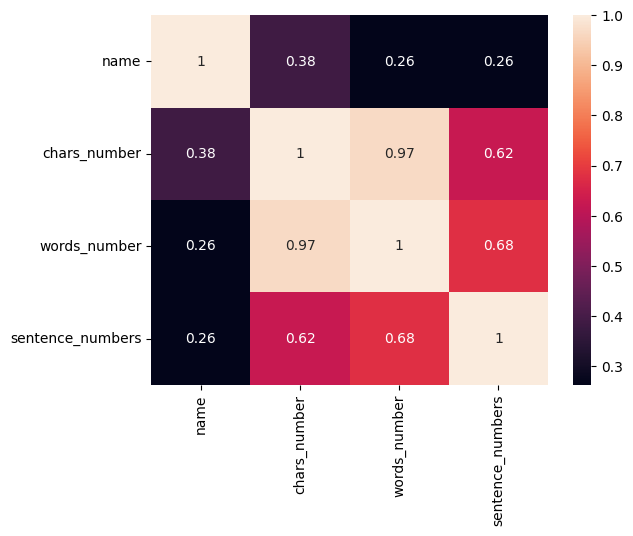

In [37]:
sns.heatmap(data.corr(), annot= True)

Here we will keep the chars_number column for model building because it has good correlation with the name column and its variation is around 0.38

#### Data Preprocessing(Texual)
     1.Lower Case Conversion
     2. Tokenization or breaking in to small
     3. Removing Special Characters
     4. Removing Stopwords (like is, of , the etc) and Punctuations.
     5. Stemming or lammetization (grouping the inflected form of word into single word.)


In [38]:
from nltk.corpus import stopwords
stopwords.words('english')
import string

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()     
        
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) 

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

ps.stem('swimming')

'swim'

In [42]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [43]:
data['transformed_text'] = data['text'].apply(transform_text)

In [44]:
data.head()

,name,text,chars_number,words_number,sentence_numbers,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc = wc.generate(data[data['name']==1]['transformed_text'].str.cat(sep = ' '))

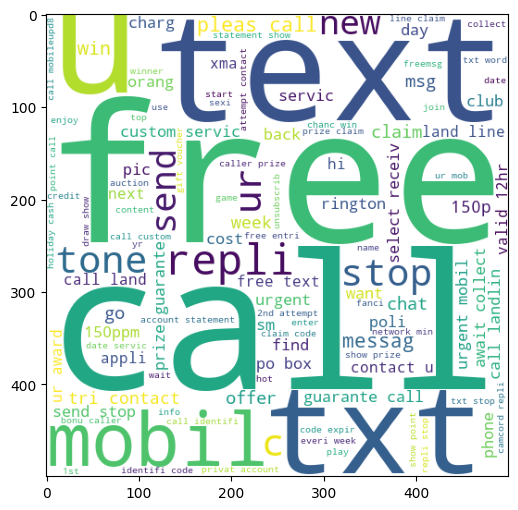

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(data[data['name']==0]['transformed_text'].str.cat(sep = ' '))

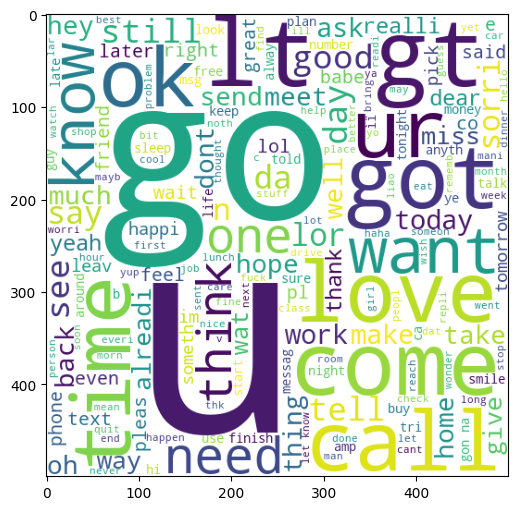

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [50]:
spam_list = []
for i in data[data['name']==1]['transformed_text'].tolist():
    for word in i.split():
        spam_list.append(word)


In [51]:
len(spam_list)

9939

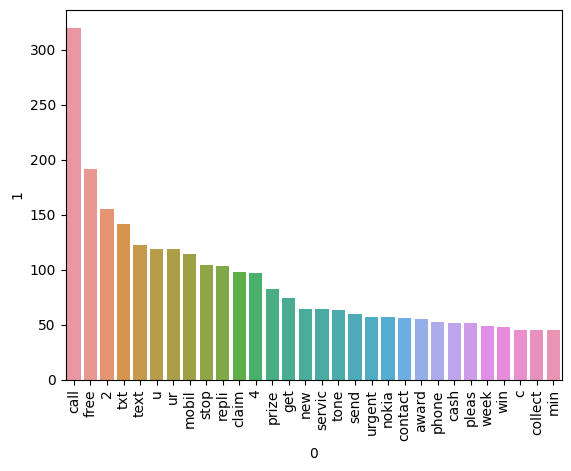

In [52]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_list).most_common(30))[0],y = pd.DataFrame(Counter(spam_list).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
ham_list = []
for i in data[data['name']==0]['transformed_text'].tolist():
    for word in i.split():
        ham_list.append(word)


In [54]:
len(ham_list)

35404

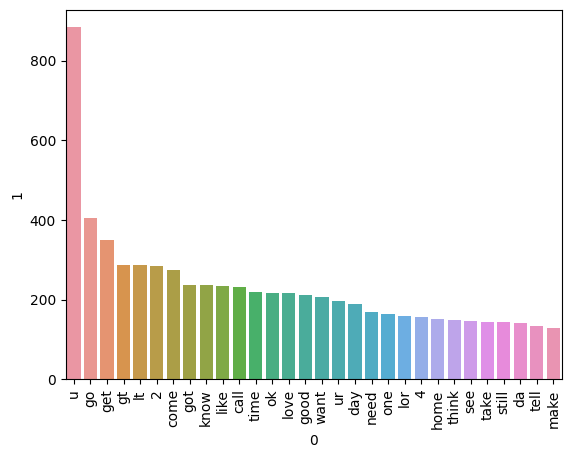

In [55]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(ham_list).most_common(30))[0],y = pd.DataFrame(Counter(ham_list).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

### 4.Model Building

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

#TfIdfVectorizer class -Convert a collection of raw documents to a matrix of TF-IDF features.

In [78]:
X = tf.fit_transform(data['transformed_text']).toarray()

In [79]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
X.shape

(5169, 3000)

after fixing the tfidfvectorizer max_features = 3000

In [81]:
Y = data['name'].values

In [82]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
g = GaussianNB()
m = MultinomialNB()
b = BernoulliNB()

In [86]:
g.fit(X_train, Y_train)
Y_pred1 = g.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred1))
print('Matrix', confusion_matrix(Y_test, Y_pred1))
print('Precision Score', precision_score(Y_test, Y_pred1))

Accuracy: 0.8907156673114119
Matrix [[3272  359]
 [  93  412]]
Precision Score 0.5343709468223087


In [87]:
m.fit(X_train, Y_train)
Y_pred2 = m.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred2))
print('Matrix', confusion_matrix(Y_test, Y_pred2))
print('Precision Score', precision_score(Y_test, Y_pred2))

Accuracy: 0.9320599613152805
Matrix [[3631    0]
 [ 281  224]]
Precision Score 1.0


In [88]:
b.fit(X_train, Y_train)
Y_pred3 = b.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred3))
print('Matrix', confusion_matrix(Y_test, Y_pred3))
print('Precision Score', precision_score(Y_test, Y_pred3))

Accuracy: 0.9489845261121856
Matrix [[3626    5]
 [ 206  299]]
Precision Score 0.9835526315789473


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [90]:
svc = SVC(kernel ='sigmoid', gamma=1.0)
kn = KNeighborsClassifier()
m = MultinomialNB()
dc = DecisionTreeClassifier(max_depth = 5)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ad = AdaBoostClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
bg = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xg = XGBClassifier(n_estimator =50, random_state=2)

In [91]:
classifier = {
    'SVC': svc,
    'KN': kn,
    'NB': m,
    'DT': dc,
    'RF': rf,
    'LR': lr,
    'Adaboost': ad,
    'BgC': bg,
    'ET': etc,
    'GBC': gb,
    'XGB': xg,
}

In [92]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)

    return accuracy, precision

In [93]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

(0.9617988394584139, 0.9460154241645244)

In [73]:
accuracy_scores = []
precision_scores = []

for name, clf in classifier.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print('For', name)
    print('Accuracy:', current_accuracy)
    print('Precision:', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy: 0.9557543520309478
Precision: 0.9497206703910615
For KN
Accuracy: 0.8808027079303675
Precision: 1.0
For NB
Accuracy: 0.9042553191489362
Precision: 1.0
For DT
Accuracy: 0.9272243713733076
Precision: 0.7073170731707317
For RF
Accuracy: 0.9523694390715667
Precision: 1.0
For LR
Accuracy: 0.9192456479690522
Precision: 0.8461538461538461
For Adaboost
Accuracy: 0.9480174081237911
Precision: 0.8918918918918919
For BgC
Accuracy: 0.9335106382978723
Precision: 0.7426160337552743
For ET
Accuracy: 0.9576885880077369
Precision: 0.9940119760479041
For GBC
Accuracy: 0.9376208897485493
Precision: 0.8034398034398035
[14:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

For XGB
Accuracy: 0.9417311411992263
Precision: 0.7773109243697479


In [74]:
performance_dataframe = pd.DataFrame({"Algorithms": classifier.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values(by = "Precision", ascending=False)

In [75]:
performance_dataframe

,Algorithms,Accuracy,Precision
1,KN,0.880803,1.000000
2,NB,0.904255,1.000000
4,RF,0.952369,1.000000
8,ET,0.957689,0.994012
0,SVC,0.955754,0.949721
6,Adaboost,0.948017,0.891892
5,LR,0.919246,0.846154
9,GBC,0.937621,0.803440
10,XGB,0.941731,0.777311
7,BgC,0.933511,0.742616


#### Above dataframe is sorted based on the accuracy

In [146]:
# model improvement
# change the max_features parameter of TfIdf

In [76]:
tf = TfidfVectorizer(max_features=3000)

In [94]:
new_per_df = pd.DataFrame({"Algorithms": classifier.keys(), "Accuracy_max_3000": accuracy_scores, "Precision_max_3000": precision_scores}).sort_values(by = "Precision_max_3000", ascending=False)

In [95]:
merged_df = performance_dataframe.merge(new_per_df, on = "Algorithms")

In [96]:
merged_df

,Algorithms,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000
0,KN,0.880803,1.000000,0.880803,1.000000
1,NB,0.904255,1.000000,0.904255,1.000000
2,RF,0.952369,1.000000,0.952369,1.000000
3,ET,0.957689,0.994012,0.957689,0.994012
4,SVC,0.955754,0.949721,0.955754,0.949721
5,Adaboost,0.948017,0.891892,0.948017,0.891892
6,LR,0.919246,0.846154,0.919246,0.846154
7,GBC,0.937621,0.803440,0.937621,0.803440
8,XGB,0.941731,0.777311,0.941731,0.777311
9,BgC,0.933511,0.742616,0.933511,0.742616


In [192]:
# Voting Classifer
svc = SVC(kernel = 'sigmoid', gamma=1.0, probability= True)
m = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2) 

from sklearn.ensemble import VotingClassifier

In [193]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', m), ('rf', rf)], voting= 'soft')

In [194]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [196]:
Y_pred_new = voting.predict(X_test)
print('Accuracy', accuracy_score(Y_test, Y_pred_new))
print('Precision', precision_score(Y_test, Y_pred_new))

Accuracy 0.9753384912959381
Precision 0.9763593380614657


##### Since applying all model and classiifers we came to know that MultinomialNB model has best precision and quite good accuracy against all the other models so we select that model 

In [216]:
import pickle
pickle.dump(tf,open('vectorizer.pkl', 'wb'))
pickle.dump(m, open('model.pkl', 'wb'))

Now using streamlit api to deploy this model in the web. 